In [25]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
import ray
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import pickle
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

In [26]:
# Read AUDUSD data file
raw_data = pd.read_csv("/home/ujwal/ML_program/Trading_financial_market/Algo-trading-with-ML/algo stratergy 1/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv")
raw_data

,Gmt time,Open,High,Low,Close,Volume
0,03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157,184.95
1,03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237,310.37
2,03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267,419.97
3,03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327,367.18
4,03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157,257.45
...,...,...,...,...,...,...
132187,01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132188,01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132189,01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132190,01.10.2022 22:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00


In [27]:
# drop everything except Time and Close information
from bleach import clean
from matplotlib.pyplot import plot


clean_data = raw_data.drop(["High", "Open", "Low", "Volume"], axis=1)
df = clean_data.set_index('Gmt time')
df
#plot()

,Close
Gmt time,
03.09.2007 00:00:00.000,0.82157
03.09.2007 01:00:00.000,0.82237
03.09.2007 02:00:00.000,0.82267
03.09.2007 03:00:00.000,0.82327
03.09.2007 04:00:00.000,0.82157
...,...
01.10.2022 19:00:00.000,0.64023
01.10.2022 20:00:00.000,0.64023
01.10.2022 21:00:00.000,0.64023


<AxesSubplot:xlabel='Gmt time'>

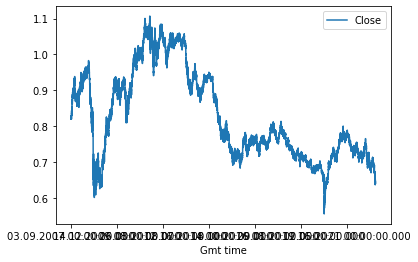

In [28]:
df.plot()

In [29]:
sum_inf = np.isinf(df).values.sum()
sum_nan = df.isna().sum()
print("number of inf value present =", sum_inf)
print("number of nan value present =", sum_nan)

number of inf value present = 0
number of nan value present = Close    0
dtype: int64


In [30]:

def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) #cross validation 

    dataset = [X_train,X_test , Y_train, Y_test , X_lately];
    return dataset;



In [31]:
forecast_col = 'Close'#choosing which column to forecast
forecast_out = 10 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in


In [32]:
print(len(df))
print("train=",len(X_train)*0.85)
print("val=", len(X_train)*0.15)

132192
train= 89883.25
val= 15861.75


In [33]:
# Split dataset to train, val, test as 70%-15%-15%
X_train1, X_val = X_train[:89883], X_train[89883:] 
Y_train1, Y_val = Y_train[:89883], Y_train[89883:] 
print(len(X_train1), len(X_val))
print(len(Y_train1), len(Y_val))

89883 15862
89883 15862


In [34]:
# Initialize the algorithm
model = LinearRegression()

In [35]:
# Just for fun doing hypter-parameter tuning
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['copy_X'] = [True, False]
space['positive'] = [True, False]
space['fit_intercept'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_val, Y_val)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/home/ujwal/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: -0.002153569590152234
Best Hyperparameters: {'positive': True, 'fit_intercept': True, 'copy_X': True}


In [54]:
# Train the algorithm
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [55]:
model.coef_

array([0.12438492])

In [56]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

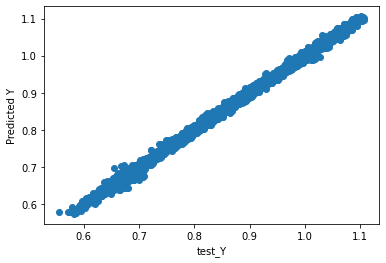

In [57]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
plt.xlabel('test_Y')
plt.ylabel('Predicted Y')

In [58]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(Y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(Y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE :   0.002128811450452542
MSE :   1.2347963013652272e-05
RMAE :   0.0035139668486843002


/home/ujwal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

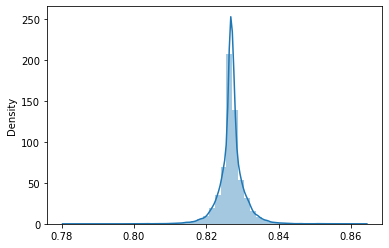

In [41]:
sns.distplot(Y_test - predictions,bins=50)

In [42]:
# save model using pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [43]:
# loading model
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [44]:
# Predicting future 10 value
forecast= pickled_model.predict(X_lately); #set that will contain the forecasted data

print(forecast)

[-0.18604237 -0.18604237 -0.18604237 -0.18604237 -0.18604237 -0.18604237
 -0.18604237 -0.18604237 -0.18604237 -0.18604237]


In [45]:
# # demonstrate prediction for next 10 days

# x_input = test_x[:1,:20]
# temp_input=list(x_input)
# n_features = 1
# lst_output=[]
# n_steps = 20
# i=0
# while(i<10):
    
#     if(len(temp_input)>3):
#         x_input=array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         #print(x_input)
#         x_input = x_input.reshape((1, n_steps, n_features))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.append(yhat[0][0])
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.append(yhat[0][0])
#         i=i+1
#     #else:
#         #x_input = x_input.reshape(1, n_steps)
#         #yhat = model.predict(x_input)
#         #print(yhat[0])
#         #temp_input.append(yhat[0][0])
#         #lst_output.append(yhat[0][0])
#         #i=i+1

# print(lst_output)